In [2]:
import cv2
import glob

# import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import os

# 1. Quality detection of retinal images

Given a training set of 80 retinal images. 40 of them have been well captured. The other half were captured under poor conditions (insufficient lighting, bad focus, ...) and are not suitable for training a neural network. Using this dataset, a generic function ```out = isSufficientQuality(im)``` is written. Its purpose is to check the quality of any retinal image. This function could be used in the process of data cleaning before training a neural network.

The accuracy check code below uses another set of 20 images (10 of sufficient quality, 10 of insufficient quality) and estimates the accuracy of your approach. The accuracy check set is not provided.

Examples of high and low quality images are found in the previous folders

In [ ]:
# FULL FUNCTION. see below cells for the testing process

def isSufficientQuality(im):
    """Checks the quality of a retinal image.
    im: 512x512x3 numpy uint8 retinal image
    returns: boolean, true if the image is of sufficient quality
    """
    
    ## function will check if image is bright enough and if optic disc can be located
    result = True
    size = 35
    
    # check if it is too dark, removes bulk of bad images
    avg_colour = np.average(im)
    if avg_colour < 26: #most bad images due to lighting have average less than 26, evidenced below
        return False
    
    # main thing being identified is that small bright circle in the eye, the optic disc
    # check if optic disc can be identified, mainly for those super bright images
    
    gray_img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) # grayscale image
    blur_img = cv2.GaussianBlur(gray_img, (41,41), 0) # gaussian blur used to normalise image avoid finding the brightest pixel
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray_img) # minMaxLoc to detect the bright spot
    
    # bounding box to extract the optic disc part of image
    # if image is poor quality, there is a poor contrast and the brightest spot cannot clearly be located
    # so the optic disc will not be able to be observed
    # circle would be ideal but more complex and requires import of Pillow library
    cv2.rectangle(im, (maxLoc[0]-size,maxLoc[1]-size), (maxLoc[0]+size, maxLoc[1]+size), (0,255,0), 1)
    piece_image = im[maxLoc[1]-size:maxLoc[1]+size,maxLoc[0]-size:maxLoc[0]+size] #extract optic disc
    
    # cv2.circle(img, maxLoc, size, (255, 0, 0), 1)
    
    if piece_image.shape != (size*2,size*2,3):
        return False
    
    
    return result

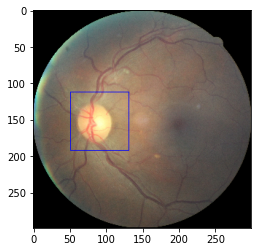

In [6]:
# testing
# MODIFY PATHS APPROPRIATELY

path_low = "images/train-low-19.jpg"
path_high = "images/train-high-16.jpg" 
img = cv2.imread(path_high)
size = 40
# make image grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur_img = cv2.GaussianBlur(gray_img, (41,41), 0) # gaussian blur used to normalise image avoid finding the brightest pixel

(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray_img) # minMaxLoc to detect the bright spot

# to draw a box around and crop the bright pixels (corresponds to optic disc)
cv2.rectangle(img, (maxLoc[0]-size,maxLoc[1]-size), (maxLoc[0]+size, maxLoc[1]+size), (255,0,0), 1) 
piece_image = img[maxLoc[1]-size:maxLoc[1]+size,maxLoc[0]-size:maxLoc[0]+size]
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()
# cv2.imshow("Robust", img)
# cv2.waitKey(0)

RGB_img = cv2.cvtColor(blur_img, cv2.COLOR_BGR2RGB)
img = Image.fromarray(RGB_img, "RGB")
#img


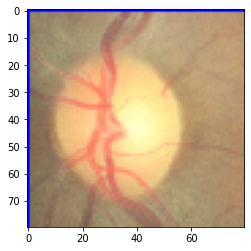

In [7]:
RGB_img = cv2.cvtColor(piece_image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

In [5]:
piece_image.shape

(42, 80, 3)

In [ ]:
cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2.rectangle(img, maxLoc, (maxLoc[0]+size, maxLoc[1]+size), (0,255,0), 4)
piece_image = frame[y:y+h,x:x+w]
piece_image = img[maxLoc[1]:maxLoc[1]+size,maxLoc[0]:maxLoc[0]+size]

In [41]:
maxLoc

(211, 285)

In [4]:
ROWS = 512    
COLS =  512

In [14]:
path_low = "images/train-low-32.jpg"
path_high = "images/train-high-0.jpg"
img_l = cv2.imread(path_low)
img_h = cv2.imread(path_high)



In [15]:
np.average(img_h)

116.64330003765804

In [97]:
# START: testing of all the functions to see how they work. until END
src = cv2.imread(path_high, 1)
tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
b, g, r = cv2.split(src)
rgba = [b,g,r, alpha]
dst = cv2.merge(rgba,4)
cv2.imwrite("test.png", dst)

True

In [11]:
np.average(img_h)

83.33736386244748

In [16]:
np.average(img_l)

25.025517984511733

In [21]:
for i in os.listdir('images'): # modify the paths accordingly
    print(i)
    image = cv2.imread('images/'+i)
    #print(image)
    print(type(image))
    avg = np.average(image)
    print("name: ", i, 'average: ', avg)
    
# END of testing. actual functions next



train-low-12.jpg
<class 'numpy.ndarray'>
name:  train-low-12.jpg average:  12.175132269213991
train-low-6.jpg
<class 'numpy.ndarray'>
name:  train-low-6.jpg average:  187.66541761277838
australia.png
<class 'numpy.ndarray'>
name:  australia.png average:  229.12293205492423
train-low-11.jpg
<class 'numpy.ndarray'>
name:  train-low-11.jpg average:  23.43662076859692
16.jpg
<class 'numpy.ndarray'>
name:  16.jpg average:  44.08174402777778
train-high-16.jpg
<class 'numpy.ndarray'>
name:  train-high-16.jpg average:  83.33736386244748
test-low-9.jpg
<class 'numpy.ndarray'>
name:  test-low-9.jpg average:  67.41471571906355
train-low-33.jpg
<class 'numpy.ndarray'>
name:  train-low-33.jpg average:  17.13650108313479
test-high-4.jpg
<class 'numpy.ndarray'>
name:  test-high-4.jpg average:  86.23050823443437
train-low-32.jpg
<class 'numpy.ndarray'>
name:  train-low-32.jpg average:  25.025517984511733
train-low-30.jpg
<class 'numpy.ndarray'>
name:  train-low-30.jpg average:  24.813853685454674
trai

In [ ]:
# function to remove black areas in the image
def remove_black(img):
    tmp = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
    b, g, r = cv2.split(img)
    rgba = [b,g,r, alpha]
    dst = cv2.merge(rgba,4)
    return dst

In [8]:
# Accuracy check

errorsCounter = 0

for imFile in glob.glob('test/good/*'):
    im = cv2.imread(imFile)
    if not isSufficientQuality(im):
        errorsCounter +=1

for imFile in glob.glob('test/bad/*'):
    im = cv2.imread(imFile)
    if isSufficientQuality(im):
        errorsCounter +=1
        
print('Accuracy: ' + str(100 * (1 - errorsCounter/20.)) + '%')

Accuracy: 100.0%


# 2. Cropping

From 20 retinal images of different resolutions and aspect ratios, we write a function ```outImg = cropRetinaImg(inImg)``` that crops a retinal image to a 512x512 image. The width and height of that image should be the diameter of the outer circle of a retinal image. The image shouldn't be distorted, which implies adding border when the circle is cropped in input images. Some images have text and eye symbols in the black area. Those should be removed from the cropped images. Some examples of the images are below:

In [29]:
## FULL FUNCTION. You can refer to the other cells below to see my testing process

def cropRetinaImg(inImg):
    """Crops a retinal image
    inImg: a row numpy uint8 retinal image of any size
    returns: a 512x512x3 cropped retinal image
    """
    image = inImg.copy()

    height, width, c = inImg.shape
    mask = np.zeros(inImg.shape, dtype=np.uint8) #mask initialized to image dimensions
    gray_img = cv2.cvtColor(inImg, cv2.COLOR_BGR2GRAY) # grayscale
    blur_img = cv2.GaussianBlur(gray_img, (41,41), 0) # blur used to normalise image
    ret, binary = cv2.threshold(blur_img, 10, 255, cv2.THRESH_BINARY) #threshold image

    kernel = np.ones((5 ,191), np.uint8)
    morph = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel) #morphology to combine small nearby threshold regions into one

    # finding the image contours    
    contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
    contours = contours[0] if len(contours) == 2 else contours[1]
    
    #drawing bounding rectangles
    for i in contours:
        x,y,w,h = cv2.boundingRect(i)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 3)
        area = w*h
        #only the biggest rectangle considered, ignore small ones
        if area > 0.5*height*width: #50% of area chosen for now, somewhat arbitrarily
            cv2.drawContours(mask, [i], -1, (255,255,255), -1)
            a,b,c,d = x,y,w,h #saving dimensions for region with eye
            
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY) #mask created
    image = cv2.bitwise_and(inImg, inImg, mask=mask) #applying mask to the image
    piece_image = image[b:b+d,a:a+c] #cropping out the excess black background
    final_image = cv2.resize(piece_image, (512,512))
    
    # image[mask==0] = (0,0,0) # alternate approach to color small rectangles black, not needed anymore
    
    return final_image
    
    
# upon testing, note that some images resizing is off its due to the eye not fitting completely into the image
# so the bounding rectangle is not a very clean square and eye image ends up being stretched, 
# can be rectified by making sure the larger dimension is resized to 512 and then black padding can be added to make the image 512x512
# to make sure aspect ratio is not affected

Text(0.5, 1.0, 'cropped image')

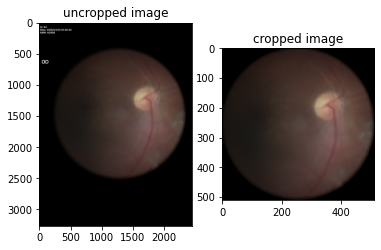

In [43]:
# Demonstration of function: the original image '4.jpg' had 
# a lot of black space and some white text. This has been 
# removed in the new cropped image as shown

img = cv2.imread("images/4.jpg")
old_image = img.copy()
new_image = cropRetinaImg(img) 


OLD_RGB_img = cv2.cvtColor(old_image, cv2.COLOR_BGR2RGB)
oldImg = Image.fromarray(OLD_RGB_img, "RGB")

NEW_RGB_IMG = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
newImg = Image.fromarray(NEW_RGB_IMG, "RGB")


plt.subplot(1,2,1)
plt.imshow(oldImg)
plt.title('uncropped image')
plt.subplot(1,2,2)
plt.imshow(newImg)
plt.title('cropped image')


In [ ]:
plt.imshow()

In [33]:
img = cv2.imread("images/4.jpg")
image = img.copy()

# image preprocessing, testing the function
height, width, c = img.shape
mask = np.zeros(img.shape, dtype=np.uint8) #mask initialized to image dimensions
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # grayscale
blur_img = cv2.GaussianBlur(gray_img, (41,41), 0) # blur used to normalise image
ret, binary = cv2.threshold(gray_img, 10, 255, cv2.THRESH_BINARY) #threshold image

kernel = np.ones((5 ,191), np.uint8)
morph = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# finding the image contours
contours = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
contours = contours[0] if len(contours) == 2 else contours[1]


for i in contours:
    x,y,w,h = cv2.boundingRect(i)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 3)
    area = w*h
    #print(area)
    if area > 0.5*height*width:
        cv2.drawContours(mask, [i], -1, (255,255,255), -1)
        a,b,c,d = x,y,w,h
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY) #mask created
image = cv2.bitwise_and(img, img, mask=mask) #applying mask to the image
piece_image = image[b:b+d,a:a+c]
final_image = cv2.resize(piece_image, (512,512))
image[mask==0] = (0,0,0) # Color small rectangles black


## To view the new image
# RGB_img = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)
# img1 = Image.fromarray(RGB_img, "RGB")
# img1

# To view the old uncropped image
# RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# img2 = Image.fromarray(RGB_img, "RGB")
# img2

#RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#plt.imshow(RGB_img)


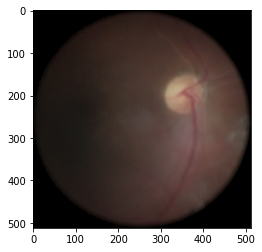

In [38]:
plt.imshow(img1)

In [33]:
piece_image.shape

(2048, 2217, 3)

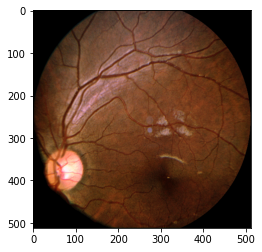

In [43]:
final_image = cv2.resize(piece_image, (512,512))
RGB_img = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [44]:
final_image.shape

(512, 512, 3)

In [8]:
cv2.namedWindow('imageWindow')
#cv2.imshow('image',image)
wait = True
while wait:
  wait = cv2.waitKey()=='q113'
cv2.destroyAllWindows()

: 

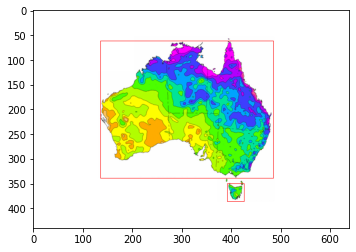

In [156]:
# testing the contour function on a colorful picture
img = cv2.imread("images/australia.png")
image = img.copy()
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur_img = cv2.GaussianBlur(gray_img, (41,41), 0) # gaussian blur used to normalise image avoid finding the brightest pixel
thresh_img = cv2.threshold(blur_img, 226, 255, cv2.THRESH_BINARY)[1]
bin_img = cv2.bitwise_not(thresh_img)


contours = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]


for i in contours:
    x,y,w,h = cv2.boundingRect(i)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 1)
    
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

In [ ]:
img = cv2.imread("images/4.jpg")


In [12]:
# Apply the function on all images

for idx, imFile in enumerate(glob.glob('toCrop/*')):
    ax2 = plt.subplot(4,5,idx+1)
    im = cropRetinaImg(cv2.imread(imFile))
    plt.imshow(im[:,:,[2,1,0]])
    ax2.axis('off')
    
fig = plt.gcf()
fig.set_size_inches(10, 10)

<Figure size 720x720 with 0 Axes>

Expected output: 

<img src="img/cropped.png">